In [17]:
library(dplyr)
library(tidyverse)

In [18]:
covid19 <- read_csv("Covid19_full_data.csv")

Rows: 231483 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): location
dbl  (8): new_cases, new_deaths, total_cases, total_deaths, weekly_cases, we...
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [19]:
glimpse(covid19)

Rows: 231,483
Columns: 10
$ date            <date> 2020-02-24, 2020-02-25, 2020-02-26, 2020-02-27, 2020-…
$ location        <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanis…
$ new_cases       <dbl> 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, …
$ new_deaths      <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ total_cases     <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 11, 11…
$ total_deaths    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ weekly_cases    <dbl> NA, NA, NA, NA, NA, 5, 5, 0, 0, 0, 0, 0, 3, 3, 3, 3, 6…
$ weekly_deaths   <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ biweekly_cases  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 8, 8, …
$ biweekly_deaths <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


In [20]:
head(covid19,10)

date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-24,Afghanistan,5,NA,5,NA,NA,NA,NA,NA
2020-02-25,Afghanistan,0,NA,5,NA,NA,NA,NA,NA
2020-02-26,Afghanistan,0,NA,5,NA,NA,NA,NA,NA
2020-02-27,Afghanistan,0,NA,5,NA,NA,NA,NA,NA
2020-02-28,Afghanistan,0,NA,5,NA,NA,NA,NA,NA
2020-02-29,Afghanistan,0,NA,5,NA,5,NA,NA,NA
2020-03-01,Afghanistan,0,NA,5,NA,5,NA,NA,NA
2020-03-02,Afghanistan,0,NA,5,NA,0,NA,NA,NA
2020-03-03,Afghanistan,0,NA,5,NA,0,NA,NA,NA


In [21]:
# clean NA 
covid19 <- replace(covid19, is.na(covid19), 0)

# **1.Total Deaths**

In [22]:
# total Deaths
covid19 %>% 
    summarise(total_deaths = max(total_deaths)) %>%
    arrange(desc(total_deaths))

    

total_deaths
<dbl>
6679784


# **2.Total Deaths in 2021**

In [23]:
# total deaths in 2021
covid19 %>%
    filter(date >= as.Date("2021-01-01") & date <= as.Date("2021-12-31")) %>%
    summarise(total_deaths_2021 = max(total_deaths)) %>%
    arrange(desc(total_deaths_2021)) 
    

total_deaths_2021
<dbl>
5469367


In [24]:
# Only contry(remove row)
covid19_country_only<-covid19[!(covid19$location=="World" 
| covid19$location=="High income" 
| covid19$location=="Upper middle income" 
| covid19$location=="Europe" 
| covid19$location=="North America"
| covid19$location=="Asia"
| covid19$location=="Lower middle income"
| covid19$location=="South America"
| covid19$location=="European Union"
| covid19$location=="North America"
),]
head(covid19_country_only,5)

date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-24,Afghanistan,5,0,5,0,0,0,0,0
2020-02-25,Afghanistan,0,0,5,0,0,0,0,0
2020-02-26,Afghanistan,0,0,5,0,0,0,0,0
2020-02-27,Afghanistan,0,0,5,0,0,0,0,0
2020-02-28,Afghanistan,0,0,5,0,0,0,0,0


# **3.Most Deaths by Country**

In [25]:
# Most deaths by country
most_deaths <- covid19_country_only %>% 
    group_by(location) %>%
    summarise(total_deaths = max(total_deaths)) %>%
    arrange(desc(total_deaths)) 
    

head(most_deaths)

location,total_deaths
<chr>,<dbl>
United States,1090218
Brazil,692969
India,530696
Russia,385513
Mexico,331021
Africa,257427


# **4.Least Deaths by Country**

In [26]:
#least dead by country
covid19_country_only %>% 
    group_by(location) %>%
    summarise(total_deaths = max(total_deaths)) %>%
    arrange((total_deaths)) %>%
    head(1)

location,total_deaths
<chr>,<dbl>
Falkland Islands,0


# **5.Zero Deaths by Country**

In [27]:
#0 deaths by country
covid19_country_only %>% 
    group_by(location) %>%
    summarise(total_deaths = max(total_deaths)) %>%
    filter(total_deaths == 0) %>%
    arrange((total_deaths))

location,total_deaths
<chr>,<dbl>
Falkland Islands,0
Saint Helena,0
Tuvalu,0
Vatican,0


# **6.Most New Case in a day**

In [28]:
covid19 %>%
    select(date,new_cases) %>%
    group_by(date) %>%
    summarise(total_new_cases = sum(new_cases)) %>%
    arrange(desc(total_new_cases)) %>%
    head(1)

date,total_new_cases
<date>,<dbl>
2022-01-19,17682010


# **7.Chart Most Deaths by Country**

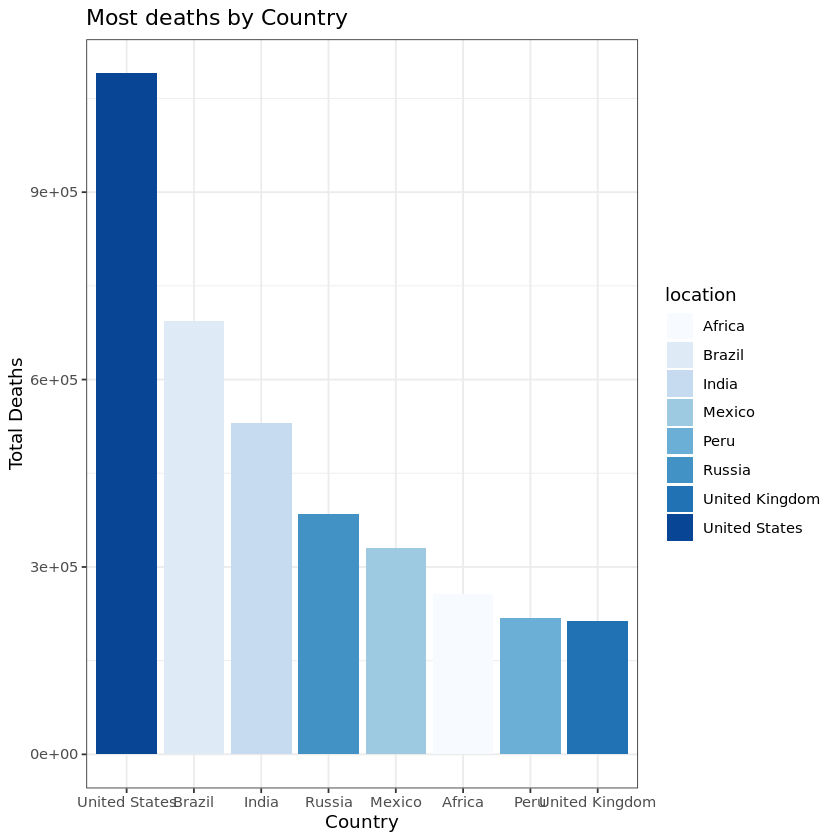

In [29]:
ggplot(data = head(most_deaths,8),
mapping = aes(x = fct_reorder(location, total_deaths,  .desc = TRUE),  
y = total_deaths, 
fill = location)) +
  geom_bar(stat = 'identity')+
  theme_bw()+
  scale_fill_brewer(palette = "Blues")+
  labs(title = "Most deaths by Country",x = "Country", y="Total Deaths")

In [30]:
covid19_world <- covid19 %>%
    select(date,new_cases,location) %>%
    filter(location == "World") %>%
    group_by(date)

head(covid19_world,5)

date,new_cases,location
<date>,<dbl>,<chr>
2020-01-22,0,World
2020-01-23,100,World
2020-01-24,287,World
2020-01-25,493,World
2020-01-26,683,World


# **8.Line Chart New Case**

`geom_smooth()` using formula 'y ~ x'



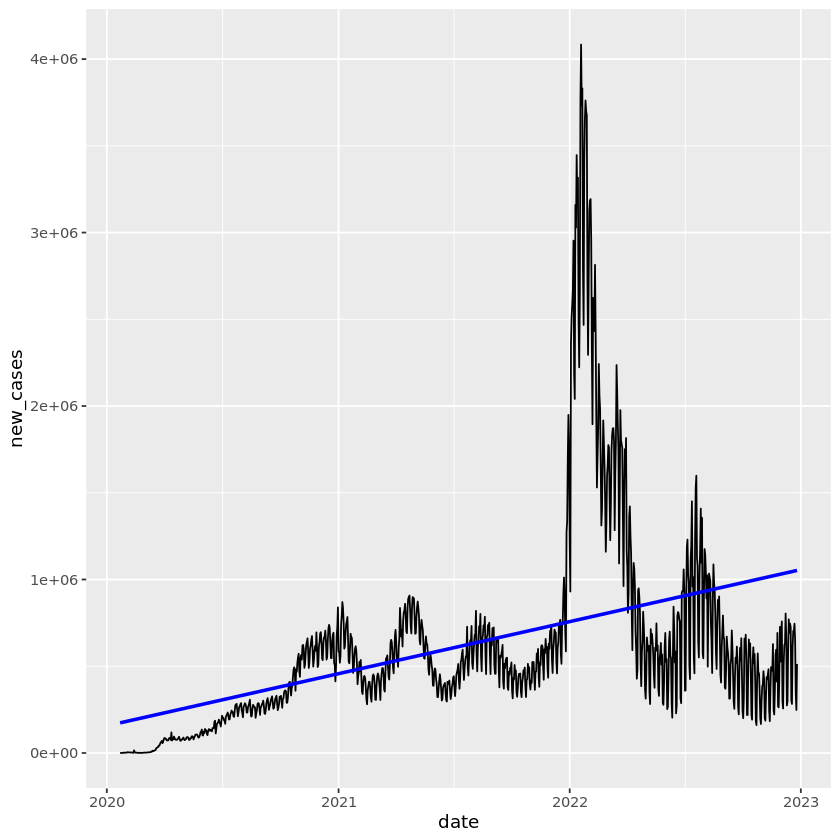

In [31]:
ggplot(covid19_world,aes(x = date,y = new_cases)) + 
  geom_line() + 
  geom_smooth(method = "lm",col = "blue",se = F)